### import os for  operating system operations e.g., creating a folder

In [126]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [127]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [128]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [129]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [130]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [131]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [132]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [133]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


In [201]:
len(dataset)

318

### Check for null and NaN values

In [134]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [135]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [136]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [137]:

df = dataset[:]

### remove the date column

In [138]:

del df['DATE']

In [139]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [140]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [141]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [142]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [143]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [144]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

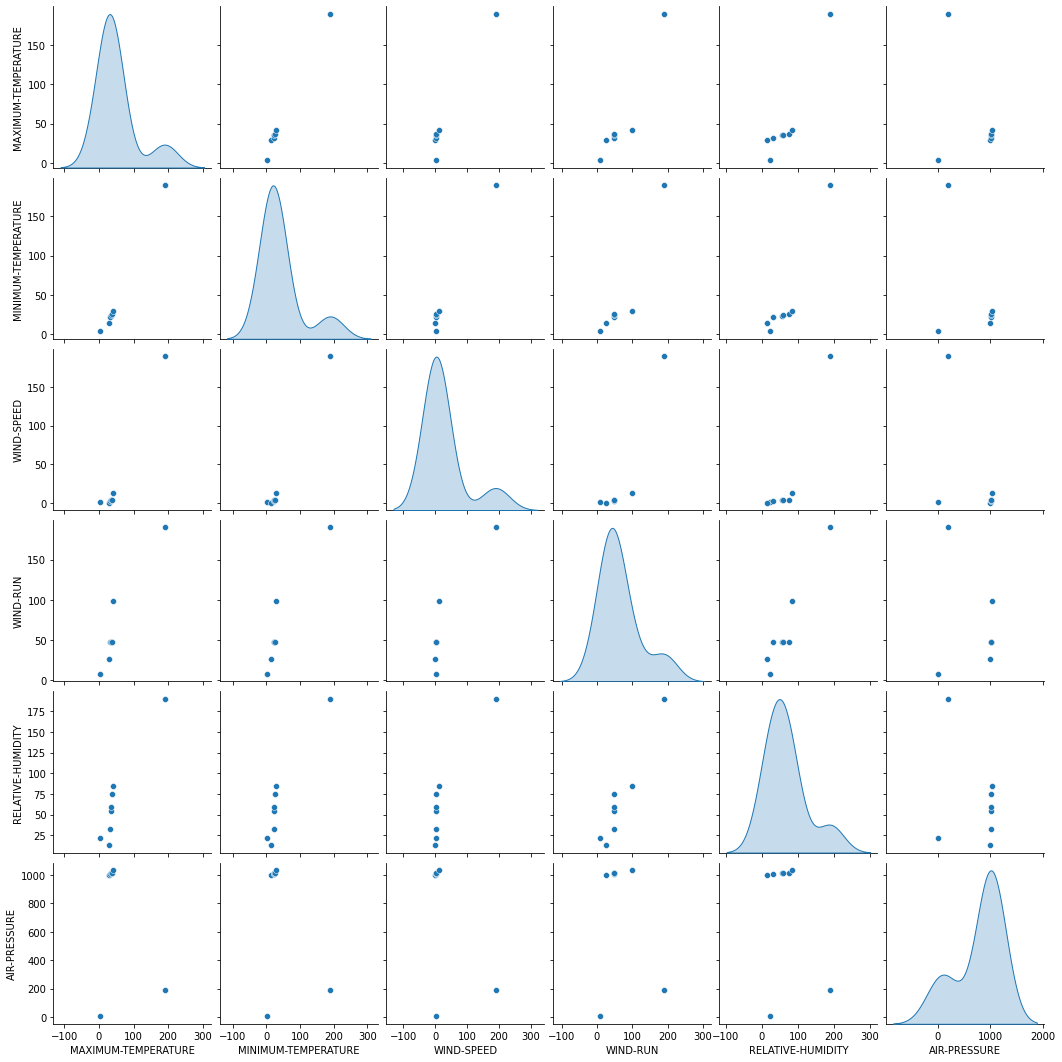

In [145]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [146]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     167.405263
std       55.090392
min       58.000000
25%      121.000000
50%      170.000000
75%      210.000000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [147]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

## Subtract the mean of the training data and divide by the standard deviation

### define a function to normalize the data set.

In [148]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x
      #return (x - train_stats['mean'] / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [149]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [150]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
7,0.164179,0.587097,0.166667,0.289916,0.957746,0.299703
38,0.783582,0.690323,0.333333,0.289916,0.126761,0.296736
291,0.716418,0.961290,0.225000,0.191877,0.309859,0.000000
64,0.664179,0.793548,0.250000,0.289916,0.676056,0.275964
290,0.597015,0.787097,0.108333,0.084034,0.000000,0.035608
178,0.507463,0.406452,0.500000,0.289916,0.380282,0.353116
9,0.328358,0.619355,0.166667,0.289916,0.873239,0.267062
196,0.626866,0.812903,0.416667,0.289916,0.619718,0.299703
46,0.611940,0.400000,0.250000,0.289916,0.577465,0.302671
210,0.171642,0.593548,0.416667,0.289916,0.901408,0.350148


## Build a Neural Network Model

### We declared a function for creating a model.

In [151]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [152]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

Here is a summary of this model: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## import NN and other components.

In [153]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [154]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
      model.add(Dropout(0.5))
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [155]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_16 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [156]:
def model3_multilayer_perceptron_with_four_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
      model.add(Dense(72, Activation('relu'))) # Hidden layer 3
      model.add(Dropout(0.5))
      model.add(Dense(80, Activation('relu'))) # Hidden layer 4
      model.add(Dropout(0.5))
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [157]:
model3 = model3_multilayer_perceptron_with_four_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_38 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_18 (Dropout)         (None, 72)                0         
_________________________________________________________________
dense_39 (Dense)   

## Test the model before training (this will use the initial weights)

In [158]:

example_result_1 = model1.predict(normed_test_data) # Here we are using the single layer perceptron model



## Compare the predicted values with the actual values 

In [159]:
print('Predicted Values')
print(example_result_1[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[-0.8574136 ]
 [-0.65734273]
 [-0.81076956]
 [-1.2481772 ]
 [-1.522535  ]
 [-1.0453014 ]
 [-0.93701464]
 [-0.46271583]
 [-1.0528681 ]
 [-0.4371895 ]]

Actual Values
133
108
153
142
208
190
 88
260
205
126


## Save checkpoints during training

In [160]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [161]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [162]:
%%time

EPOCHS = 1000
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:38074.9844,  mae:190.9946,  mape:100.4478,  mse:38074.9844,  val_loss:29096.3203,  val_mae:162.9560,  val_mape:100.6246,  val_mse:29096.3203,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 100, loss:39953.7461,  mae:190.1550,  mape:100.2743,  mse:39953.7461,  val_loss:28957.8789,  val_mae:162.5404,  val_mape:100.3475,  val_mse:28957.8789,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 200, loss:30911.5137,  mae:170.1040,  mape:100.0615,  mse:30911.5137,  val_loss:28821.8359,  val_mae:162.1308,  val_mape:100.0744,  val_mse:28821.8359,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 300, loss:25536.8496,  mae:151.6599,  mape:99.8581,  mse:25536.8496,  val_loss:28686.1914,  val_mae:161.7214,  val_mape:99.8015,  val_mse:28686.1914,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 400, loss:33932.2812,  mae:176.0818,  mape:99.6306,  mse:33932.2812,  val_loss:28550.1660,  val_mae:161.3098,  val_mape:99.5271,  val_mse:28550.1660,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 500, loss:27838.1973,  mae:158.3104,  mape:99.2282,  mse:27838.1973,  val_loss:28415.4102,  val_mae:160.9009,  val_mape:99.2544,  val_mse:28415.4102,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 600, loss:29209.3145,  mae:164.2401,  mape:99.1804,  mse:29209.3145,  val_loss:28280.7891,  val_mae:160.4915,  val_mape:98.9815,  val_mse:28280.7891,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 700, loss:34849.9180,  mae:182.0739,  mape:98.9831,  mse:34849.9180,  val_loss:28146.3984,  val_mae:160.0817,  val_mape:98.7083,  val_mse:28146.3984,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 800, loss:25265.5156,  mae:152.2665,  mape:98.6594,  mse:25265.5156,  val_loss:28012.8359,  val_mae:159.6734,  val_mape:98.4360,  val_mse:28012.8359,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 900, loss:41784.8516,  mae:203.8996,  mape:98.8927,  mse:41784.8516,  val_loss:27879.2734,  val_mae:159.2640,  val_mape:98.1631,  val_mse:27879.2734,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


Wall time: 17min 51s
Parser   : 179 ms


In [163]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,28156.609375,152.742844,28156.609375,97.979530,27753.195312,158.876617,27753.195312,97.904831,995
996,35242.132812,179.661865,35242.132812,98.363739,27751.849609,158.872482,27751.849609,97.902069,996
997,29809.447266,165.525024,29809.447266,98.295288,27750.501953,158.868317,27750.501953,97.899315,997
998,32616.548828,173.032272,32616.548828,98.499756,27749.156250,158.864182,27749.156250,97.896553,998
999,38449.957031,192.104721,38449.957031,98.441673,27747.775391,158.859940,27747.775391,97.893730,999


In [164]:
# Test the model after training
example_result_2 = model1.predict(normed_test_data)

## Compare the predicted values with the actual values

In [165]:
print('Predicted Values')
print(example_result_2[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.5919707]
 [3.2512627]
 [3.4000626]
 [3.15909  ]
 [3.68824  ]
 [3.608126 ]
 [2.8219767]
 [2.7615955]
 [3.7997856]
 [2.2918665]]

Actual Values
133
108
153
142
208
190
 88
260
205
126


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

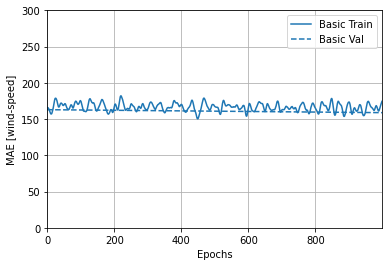

In [166]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,300])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

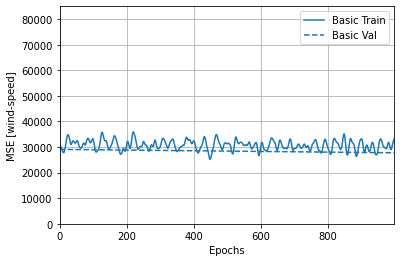

In [167]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,85000])
plt.ylabel('MSE [wind-speed]')

In [168]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 30157.5293 - mae: 164.7889 - mse: 30157.5293 - mape: 98.2579
Train set Mean Abs Error : 164.79
Train set Mean Square Error : 30157.53


In [169]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 1s - loss: 27747.7773 - mae: 158.8599 - mse: 27747.7773 - mape: 97.8937
Validation set Mean Abs Error : 158.86
Validation set Mean Square Error : 27747.78


In [170]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 29020.1211 - mae: 161.1060 - mse: 29020.1211 - mape: 97.8630
Testing set Mean Abs Error : 161.11
Testing set Mean Square Error : 29020.12


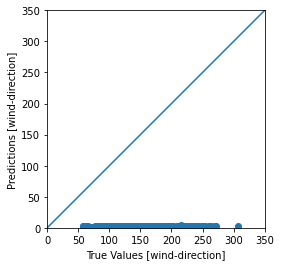

In [171]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

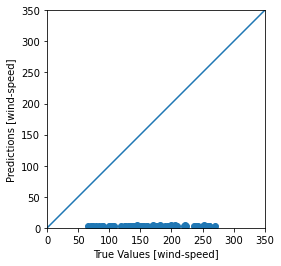

In [172]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

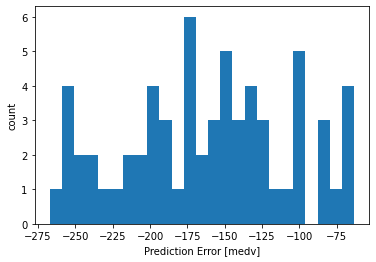

In [173]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [174]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [175]:
%%time

EPOCHS = 1000
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_20 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_21 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:48070.1055,  mae:210.9583,  mape:100.2929,  mse:48070.1055,  val_loss:2

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 100, loss:31946.0879,  mae:165.9229,  mape:97.7038,  mse:31946.0879,  val_loss:27784.0273,  val_mae:159.0147,  val_mape:98.0265,  val_mse:27784.0273,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 200, loss:36935.4375,  mae:184.6878,  mape:94.0883,  mse:36935.4375,  val_loss:25076.7539,  val_mae:150.5008,  val_mape:92.3740,  val_mse:25076.7539,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 300, loss:21014.8301,  mae:141.8784,  mape:87.4998,  mse:21014.8301,  val_loss:20004.8223,  val_mae:133.0533,  val_mape:80.7713,  val_mse:20004.8223,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 400, loss:19737.0723,  mae:133.0229,  mape:68.2826,  mse:19737.0723,  val_loss:12815.0498,  val_mae:103.3362,  val_mape:60.9965,  val_mse:12815.0498,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 500, loss:3847.2292,  mae:49.2236,  mape:44.2991,  mse:3847.2292,  val_loss:5680.1543,  val_mae:62.0372,  val_mape:34.1226,  val_mse:5680.1543,  
..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 600, loss:3327.5417,  mae:50.3328,  mape:32.6850,  mse:3327.5417,  val_loss:2198.1255,  val_mae:38.4299,  val_mape:24.0947,  val_mse:2198.1255,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......................
Epoch: 700, loss:3514.7542,  mae:51.3289,  mape:29.6889,  mse:3514.7542,  val_loss:1972.9802,  val_mae:37.2799,  val_mape:26.2603,  val_mse:1972.9802,  
...............................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.....................................................
Epoch: 800, loss:1819.5963,  mae:34.3447,  mape:17.3249,  mse:1819.5963,  val_loss:2043.6913,  val_mae:37.7337,  val_mape:27.4691,  val_mse:2043.6913,  
....................................................................................................
Epoch: 900, loss:5452.5317,  mae:62.8415,  mape:40.7770,  mse:5452.5317,  val_loss:1970.0219,  val_mae:37.1281,  val_mape:26.5892,  val_mse:1970.0219,  
.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


............................................................................Wall time: 18min 49s


In [176]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,984.126038,28.319872,984.126038,19.177889,1975.324707,37.069992,1975.324707,26.757423,995
996,11606.109375,94.326111,11606.109375,45.504807,1991.736206,37.184181,1991.736206,26.972664,996
997,4213.986816,46.536228,4213.986816,33.106766,1972.532837,37.048889,1972.532715,26.725378,997
998,4718.915527,56.013905,4718.915527,38.508163,1962.258911,36.987408,1962.258789,26.592710,998
999,2876.140869,44.623901,2876.140869,32.451920,1962.432983,36.986748,1962.432983,26.594498,999


In [177]:
# Test the model after training
example_result_3 = model2.predict(normed_test_data)

## Compare the predicted values with the actual values

In [178]:
print('Predicted Values')
print(example_result_3[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[176.67717]
 [167.4765 ]
 [175.03383]
 [188.68141]
 [211.10776]
 [188.17525]
 [168.27353]
 [158.77669]
 [187.8946 ]
 [137.51299]]

Actual Values
133
108
153
142
208
190
 88
260
205
126


In [179]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,984.126038,28.319872,984.126038,19.177889,1975.324707,37.069992,1975.324707,26.757423,995
996,11606.109375,94.326111,11606.109375,45.504807,1991.736206,37.184181,1991.736206,26.972664,996
997,4213.986816,46.536228,4213.986816,33.106766,1972.532837,37.048889,1972.532715,26.725378,997
998,4718.915527,56.013905,4718.915527,38.508163,1962.258911,36.987408,1962.258789,26.592710,998
999,2876.140869,44.623901,2876.140869,32.451920,1962.432983,36.986748,1962.432983,26.594498,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

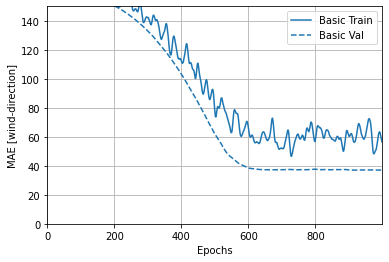

In [180]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

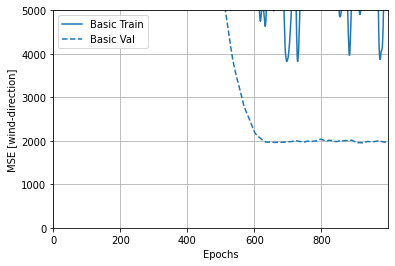

In [181]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [182]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2665.5500 - mae: 41.2333 - mse: 2665.5500 - mape: 25.8526
Train set Mean Abs Error : 41.23
Train set Mean Square Error : 2665.55


In [183]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1962.4330 - mae: 36.9867 - mse: 1962.4330 - mape: 26.5945
Validation set Mean Abs Error : 36.99
Validation set Mean Square Error : 1962.43


In [184]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2612.0430 - mae: 41.5635 - mse: 2612.0430 - mape: 31.2870
Testing set Mean Abs Error : 41.56
Testing set Mean Square Error : 2612.04


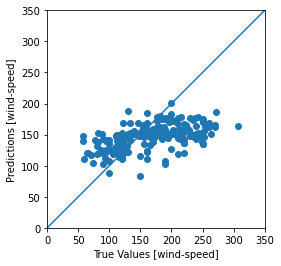

In [185]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

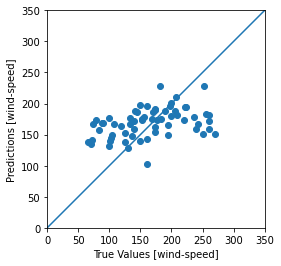

In [186]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

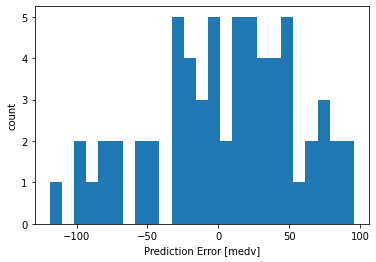

In [187]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## Four hidden layer analysis

In [188]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [189]:
%%time

EPOCHS = 1000
batch_size = 6

model3 = model3_multilayer_perceptron_with_four_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_48 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_23 (Dropout)         (None, 72)                0         
_________________________________________________________________
dense_49 (Dense)   

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.
Epoch: 100, loss:9234.3896,  mae:74.8599,  mape:48.2892,  mse:9234.3896,  val_loss:1692.3668,  val_mae:34.8855,  val_mape:24.1120,  val_mse:1692.3668,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........
Epoch: 200, loss:5938.8184,  mae:59.5459,  mape:31.5956,  mse:5938.8184,  val_loss:1707.2467,  val_mae:33.8917,  val_mape:21.4236,  val_mse:1707.2467,  
.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............
Epoch: 300, loss:7595.5581,  mae:63.0181,  mape:45.1140,  mse:7595.5581,  val_loss:1805.8658,  val_mae:33.7256,  val_mape:20.3611,  val_mse:1805.8658,  
.............................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......................................................................
Epoch: 400, loss:4064.3733,  mae:58.2507,  mape:38.1094,  mse:4064.3733,  val_loss:2226.8899,  val_mae:36.9854,  val_mape:21.1910,  val_mse:2226.8899,  
....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............................................................................
Epoch: 500, loss:3213.0139,  mae:44.8739,  mape:37.0552,  mse:3213.0139,  val_loss:2327.5945,  val_mae:38.3503,  val_mape:21.8732,  val_mse:2327.5945,  
.....................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............................................
Epoch: 600, loss:5785.7612,  mae:62.7229,  mape:38.2348,  mse:5785.7612,  val_loss:3141.8264,  val_mae:46.1577,  val_mape:26.2033,  val_mse:3141.8264,  
....................................................................................................
Epoch: 700, loss:1740.1768,  mae:35.0653,  mape:22.3550,  mse:1740.1768,  val_loss:5013.0449,  val_mae:60.6371,  val_mape:34.6614,  val_mse:5013.0449,  
....................................................................................................
Epoch: 800, loss:3030.8948,  mae:46.6842,  mape:31.4768,  mse:3030.8948,  val_loss:3848.1514,  val_mae:52.0826,  val_mape:29.6654,  val_mse:3848.1514,  
....................................................................................................
Epoch: 900, loss:2025.1470,  mae:36.9403,  mape:23.8229,  mse:2025.1470,  val_loss:4024.0161,  val_mae:53.6834,  val_mape:30.7277,  val_mse:4024.0161,  
.....................................

In [190]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,3089.640625,43.550140,3089.640625,46.278812,4467.515137,57.069065,4467.515137,32.772728,995
996,4036.586670,57.225117,4036.586670,25.346544,3305.390137,48.138779,3305.390625,27.608047,996
997,1141.884399,29.795317,1141.884399,15.162427,3121.822021,46.664669,3121.822021,26.785915,997
998,6264.027344,61.534424,6264.027344,54.601513,4418.013184,56.665726,4418.013184,32.527161,998
999,1084.774780,25.435190,1084.774780,17.454670,4591.611328,57.981438,4591.611328,33.315037,999


In [191]:
# Test the model after training
example_result_4 = model3.predict(normed_test_data)


## Compare the Actual Values with the predicted values

In [192]:
print('Predicted Values')
print(example_result_4[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[105.07054 ]
 [108.25379 ]
 [109.25501 ]
 [117.41611 ]
 [145.85368 ]
 [117.66068 ]
 [ 97.06199 ]
 [124.50146 ]
 [111.326385]
 [ 76.70711 ]]

Actual Values
133
108
153
142
208
190
 88
260
205
126


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

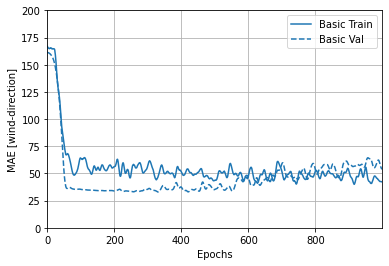

In [193]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,200])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

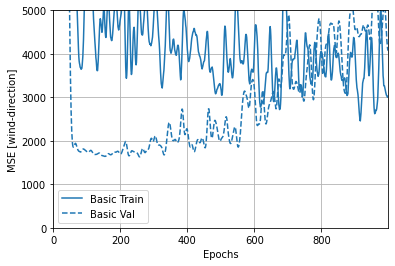

In [194]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [195]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 3879.4395 - mae: 51.2237 - mse: 3879.4395 - mape: 28.5469
Train set Mean Abs Error : 51.22
Train set Mean Square Error : 3879.44


In [196]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 4591.6113 - mae: 57.9814 - mse: 4591.6113 - mape: 33.3150
Validation set Mean Abs Error : 57.98
Validation set Mean Square Error : 4591.61


In [197]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 5465.6328 - mae: 60.7455 - mse: 5465.6328 - mape: 33.0190
Testing set Mean Abs Error : 60.75
Testing set Mean Square Error : 5465.63


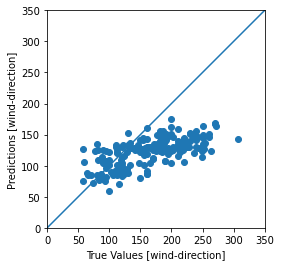

In [198]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

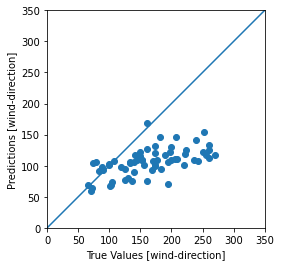

In [199]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

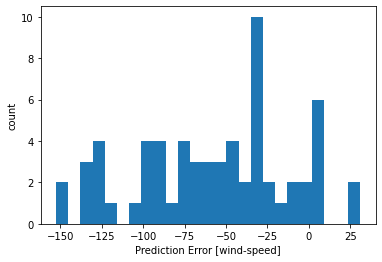

In [200]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")